***IMDB MOVIE REVIEWS ANALYSIS***

***LOADING MODULES***

In [19]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import pickle
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,ConfusionMatrixDisplay
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


***Download NLTK RESOURCES***

In [20]:
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

***Loading Dataset***

In [21]:
df=pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [22]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


***EDA (EXPLORAITY DATA ANALYSIS)***

In [23]:
df.isna().sum()

,0
review,0
sentiment,0


In [24]:
df.dtypes

,0
review,object
sentiment,object


In [25]:
df.duplicated().sum()

np.int64(418)

In [26]:
df.drop_duplicates(inplace=True)

In [27]:
df.duplicated().sum()

np.int64(0)

In [28]:
df.shape

(49582, 2)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49582 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49582 non-null  object
 1   sentiment  49582 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


***Using stemmer and stopwords***

In [30]:
stemmer=PorterStemmer()
stop_words=set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

***text cleaning and text pre-processing***

In [31]:
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)

    # Remove URLs and emails
    text = re.sub(r'\S+@\S+', '', text)  # Emails
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # URLs

    # Remove special characters (keeping basic punctuation)
    text = re.sub(r'[^\w\s.,!?]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenization using NLTK
    tokens = word_tokenize(text)

    process_tokens=[]
    for token in tokens:
      if token not in stop_words:
        process_tokens.append(stemmer.stem(token))

    return ' '.join(process_tokens)

print("Loading and Pre-Processing data....")
df['processed_review']=df['review'].apply(preprocess_text)



Loading and Pre-Processing data....


***Verify Tokenization***

In [32]:
print("Sample tokenized output :")
print("Original:",df['review'].iloc[0][:60],"....")
print("Processed:",df['processed_review'].iloc[0][:60],"....")


Sample tokenized output :
Original: One of the other reviewers has mentioned that after watching ....
Processed: one review mention watch 1 oz episod youll hook . right , ex ....


***Train-Test Split***

In [33]:
X=df['processed_review']
y=df['sentiment']

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


***Vectorizer***

In [35]:
vectorizer=TfidfVectorizer(max_features=10000,
    tokenizer=word_tokenize,
    preprocessor=None,
    token_pattern=None,
    ngram_range=(1, 2)
    )
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

***LOGISTIC REGRESSION***

In [36]:
print("\nTraining Logistic Regression...")
lr_model = LogisticRegression(max_iter=1000, C=1.0)
lr_model.fit(X_train_vec, y_train)

# Save LR model
with open('models/logistic_regression.pkl', 'wb') as f:
    pickle.dump(lr_model, f)


lr_pred = lr_model.predict(X_test_vec)
lr_acc = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred,pos_label='positive')
print(f"Accuracy: {lr_acc:.4f}")
print(f"F1 Score: {lr_f1:.4f}")
print(f"Confusion Matrix:{confusion_matrix(y_test,lr_pred)}")


Training Logistic Regression...
Accuracy: 0.8924
F1 Score: 0.8943
Confusion Matrix:[[4337  602]
 [ 465 4513]]


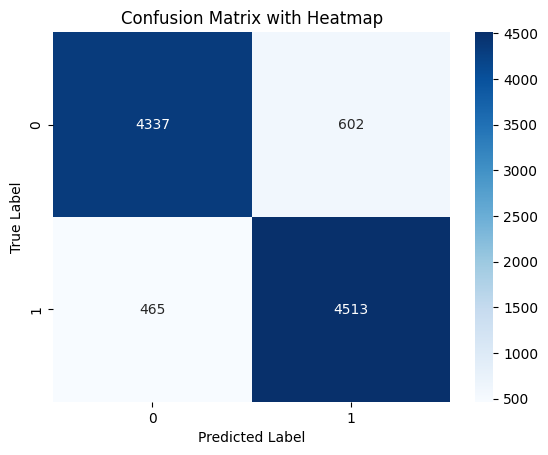

In [37]:
cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix with Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

***Naive-Bayes***

In [38]:
print("\nTraining Naive Bayes...")
nb_model = MultinomialNB(alpha=0.1)
nb_model.fit(X_train_vec, y_train)


with open('models/naive_bayes.pkl', 'wb') as f:
    pickle.dump(nb_model, f)


nb_pred = nb_model.predict(X_test_vec)
nb_acc = accuracy_score(y_test, nb_pred)
nb_f1 = f1_score(y_test, nb_pred,pos_label='positive')
print(f"Accuracy: {nb_acc:.4f}")
print(f"F1 Score: {nb_f1:.4f}")
print(f"Confusion Matrix:{confusion_matrix(y_test,nb_pred)}")


Training Naive Bayes...
Accuracy: 0.8629
F1 Score: 0.8663
Confusion Matrix:[[4151  788]
 [ 572 4406]]


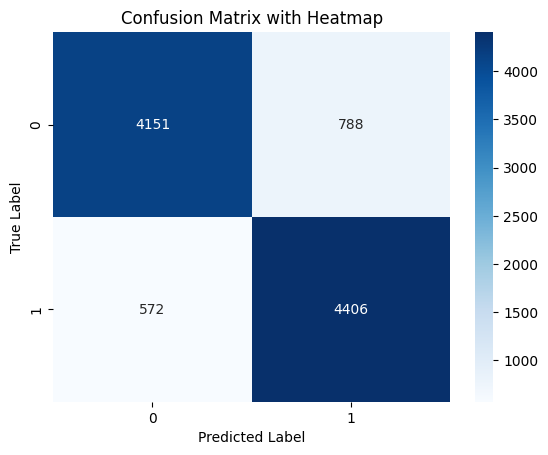

In [39]:
cm = confusion_matrix(y_test, nb_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix with Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [40]:
with open('models/vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

print("\nAll models and vectorizer saved to /models directory")
print("="*50)
print("Final Model Performance:")
print(f"Logistic Regression - Accuracy: {lr_acc:.4f}, F1: {lr_f1:.4f}")
print(f"Naive Bayes - Accuracy: {nb_acc:.4f}, F1: {nb_f1:.4f}")


All models and vectorizer saved to /models directory
Final Model Performance:
Logistic Regression - Accuracy: 0.8924, F1: 0.8943
Naive Bayes - Accuracy: 0.8629, F1: 0.8663
